In [ ]:
# This notebook is used specifically for testing the Q-learning agent on unseen data. 

In [1]:
!pip install gymnasium

In [2]:
# Load Dependencies 
import numpy as np
import random
import gymnasium as gym
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
import datetime
from gymnasium.spaces import Discrete
import pandas as pd

In [3]:
# Flat list of workouts 
workouts = [
{"id": 0, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Beginner Strength", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 1, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Overall body strength", "duration": "45 minutes", "difficulty": "Advanced"}, 
{"id": 2, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Leg power", "duration": "40 minutes", "difficulty": "Intermediate"},
{"id": 3, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Arm power", "duration": "30 minutes", "difficulty": "Any"}, 

{"id": 4, "category": "Calisthenics", "name": "Calisthenics Basics - Level 1", "duration": "30 minutes", "difficulty": "Any"},
{"id": 5, "category": "Calisthenics", "name": "Calisthenics Basics - Level 2", "duration": "45 minutes", "difficulty": "Beginner"},
{"id": 6, "category": "Calisthenics", "name": "Calisthenics Total Body - Intermediate", "duration": "50 minutes", "difficulty": "Intermediate"},
{"id": 7, "category": "Calisthenics", "name": "Calisthenics Total Body - Advanced", "duration": "50 minutes", "difficulty": "Advanced"},
    
{"id": 8, "category": "Low-impact", "name": "LOW-IMPACT: Sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Any"},
{"id": 9, "category": "Low-impact", "name": "LOW-IMPACT: Beginner sculpt with resistance bands", "duration": "15 minutes", "difficulty": "Beginner"},
{"id": 10, "category": "Low-impact", "name": "LOW-IMPACT: Intermediate sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 11, "category": "Low-impact", "name": "LOW-IMPACT: Super sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Advanced"},

{"id": 12, "category": "Yoga", "name": "YOGA: Vinyasa Yoga", "duration": "40 minutes", "difficulty": "Intermediate"},  
{"id": 13, "category": "Yoga", "name": "YOGA: Balance", "duration": "35 minutes", "difficulty": "Advanced"},   
{"id": 14, "category": "Yoga", "name": "YOGA: Sun Salutations", "duration": "20 minutes", "difficulty": "Beginner"},
{"id": 15, "category": "Yoga", "name": "YOGA Fundamentals", "duration": "20 minutes", "difficulty": "Any"},    

{"id": 16, "category": "Pilates", "name": "Mat Pilates Beginner", "duration": "30 minutes", "difficulty": "Beginner"},    
{"id": 17, "category": "Pilates", "name": "Mat Pilates Intermediate", "duration": "45 minutes", "difficulty": "Intermediate"},  
{"id": 18, "category": "Pilates", "name": "Mat Pilates Advanced", "duration": "60 minutes", "difficulty": "Advanced"},
{"id": 19, "category": "Pilates", "name": "Mat Pilates Fundamentals", "duration": "30 minutes", "difficulty": "Any"},    

{"id": 20, "category": "Barre", "name": "Intro to Barre", "duration": "20 minutes", "difficulty": "Any"},  
{"id": 21, "category": "Barre", "name": "Beginner Barre", "duration": "30 minutes", "difficulty": "Beginner"},  
{"id": 22, "category": "Barre", "name": "Intermediate Barre", "duration": "40 minutes", "difficulty": "Intermediate"},  
{"id": 23, "category": "Barre", "name": "Advanced Barre - Extreme", "duration": "45 minutes", "difficulty": "Advanced"}, 

{"id": 24, "category": "Mobility", "name": "MOBILITY: Warm-up", "duration": "10 minutes", "difficulty": "Any"}, 
{"id": 25, "category": "Mobility", "name": "MOBILITY: Movement maximiser", "duration": "20 minutes", "difficulty": "Advanced"},
{"id": 26, "category": "Mobility", "name": "MOBILITY: Increase Range of Movement", "duration": "15 minutes", "difficulty": "Intermediate"},    
{"id": 27, "category": "Mobility", "name": "MOBILITY Basics", "duration": "15 minutes", "difficulty": "Beginner"},

{"id": 28, "category": "Flexibility", "name": "Flexibility Basics", "duration": "10 minutes", "difficulty": "Beginner"}, 
{"id": 29, "category": "Flexibility", "name": "FLEXIBILITY: Flex & Flow", "duration": "15 minutes", "difficulty": "Intermediate"},
{"id": 30, "category": "Flexibility", "name": "FLEXIBILITY: Stretch Further", "duration": "15 minutes", "difficulty": "Advanced"},
{"id": 31, "category": "Flexibility", "name": "Flexibility Warm-down stretch", "duration": "10 minutes", "difficulty": "Any"},     

{"id": 32, "category": "Core", "name": "Core Essentials 1", "duration": "10 minutes", "difficulty": "Beginner"},     
{"id": 33, "category": "Core", "name": "Core Circuit", "duration": "30 minutes", "difficulty": "Advanced"},  
{"id": 34, "category": "Core", "name": "Core Essentials 2", "duration": "15 minutes", "difficulty": "Intermediate"},   
{"id": 35, "category": "Core", "name": "Core Basics", "duration": "15 minutes", "difficulty": "Any"}, 

{"id": 36, "category": "Road Running", "name": "Road Running - Build to a faster 5K", "duration": "45 minutes", "difficulty": "Any"},
{"id": 37, "category": "Road Running", "name": "Road Running - Beginner Run", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 38, "category": "Road Running", "name": "Road Running - 10k Target Time", "duration": "60 minutes", "difficulty": "Intermediate"},         
{"id": 39, "category": "Road Running", "name": "Road Running - Half Marathon Training", "duration": "45 minutes", "difficulty": "Advanced"},            

{"id": 40, "category": "Treadmill Running", "name": "Treadmill Running - hill sprints", "duration": "30 minutes", "difficulty": "Advanced"},  
{"id": 41, "category": "Treadmill Running", "name": "Treadmill Running - 5K Run", "duration": "30 minutes", "difficulty": "Beginner"},  
{"id": 42, "category": "Treadmill Running", "name": "Treadmill Running - Speed Endurance Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 43, "category": "Treadmill Running", "name": "Treadmill Running - Power & Endurance", "duration": "40 minutes", "difficulty": "Any"},

{"id": 44, "category": "Track Running", "name": "Track Running - 400m repeats for a faster 5k", "duration": "60 minutes", "difficulty": "Beginner"},  
{"id": 45, "category": "Track Running", "name": "Track Running - Threshold Intervals", "duration": "60 minutes", "difficulty": "Intermediate"},
{"id": 46, "category": "Track Running", "name": "Track Running - Speed Intervals", "duration": "45 minutes", "difficulty": "Advanced"}, 
{"id": 47, "category": "Track Running", "name": "Track Running - Power & Endurance", "duration": "45 minutes", "difficulty": "Any"},     

{"id": 48, "category": "HIIT", "name": "Beginner HIIT", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 49, "category": "HIIT", "name": "Intermediate HIIT", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 50, "category": "HIIT", "name": "Advanced HIIT", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 51, "category": "HIIT", "name": "HIIT Fundamentals", "duration": "30 minutes", "difficulty": "Any"},    

{"id": 52, "category": "Circuit", "name": "Beginner Circuit", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 53, "category": "Circuit", "name": "Intermediate Circuit", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 54, "category": "Circuit", "name": "Advanced Circuit", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 55, "category": "Circuit", "name": "Circuit Training Fundamentals", "duration": "30 minutes", "difficulty": "Any"},        
    
{"id": 56, "category": "CrossFit", "name": "Beginner CrossFit", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 57, "category": "CrossFit", "name": "Intermediate CrossFit", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 58, "category": "CrossFit", "name": "Advanced CrossFit", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 59, "category": "CrossFit", "name": "CrossFit Training Fundamentals", "duration": "30 minutes", "difficulty": "Any"},        
     
{"id": 60, "category": "Cycling", "name": "Cycling - 30/30 blast", "duration": "45 minutes", "difficulty": "Advanced"},  
{"id": 61, "category": "Cycling", "name": "Cycling Tempo Intervals", "duration": "60 minutes", "difficulty": "Intermediate"},
{"id": 62, "category": "Cycling", "name": "Cycling - High Cadence Ride", "duration": "60 minutes", "difficulty": "Any"},    
{"id": 63, "category": "Cycling", "name": "Basic Cycling Cardio", "duration": "45 minutes", "difficulty": "Beginner"}, 

{"id": 64, "category": "Skipping", "name": "Beginner Skipping", "duration": "15 minutes", "difficulty": "Beginner"},  
{"id": 65, "category": "Skipping", "name": "Intermediate Skipping", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 66, "category": "Skipping", "name": "Advanced Skipping", "duration": "30 minutes", "difficulty": "Advanced"},    
{"id": 67, "category": "Skipping", "name": "Skipping Fundamentals", "duration": "15 minutes", "difficulty": "Any"},     
    
{"id": 68, "category": "Swimming", "name": "Continuous Swim", "duration": "30 minutes", "difficulty": "Beginner"}, 
{"id": 69, "category": "Swimming", "name": "Swimming Technique Work", "duration": "30 minutes", "difficulty": "Any"}, 
{"id": 70, "category": "Swimming", "name": "Swimming: Speed Intervals", "duration": "45 minutes", "difficulty": "Intermediate"},     
{"id": 71, "category": "Swimming", "name": "Swimming Endurance Intervals", "duration": "60 minutes", "difficulty": "Advanced"},
    
    
{"id": 72, "category": "Elliptical", "name": "Elliptical: 15 minutes beginner workout", "duration": "15 minutes", "difficulty": "Beginner"},  
{"id": 73, "category": "Elliptical", "name": "Elliptical blast", "duration": "45 minutes", "difficulty": "Intermediate"},      
{"id": 74, "category": "Elliptical", "name": "Elliptical Power & Resistance", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 75, "category": "Elliptical", "name": "Elliptical continuous", "duration": "30 minutes", "difficulty": "Any"},      
    
    
{"id": 76, "category": "Rowing", "name": "Beginner Rowing Workout", "duration": "20 minutes", "difficulty": "Beginner"},
{"id": 77, "category": "Rowing", "name": "ROWING: Power intervals", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 78, "category": "Rowing", "name": "Rowing Speed Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},      
{"id": 79, "category": "Rowing", "name": "Rowing - Warm up", "duration": "10 minutes", "difficulty": "Any"},

{"id": 80, "category": "Stair Climb", "name": "Beginner Stair Climb Workout", "duration": "15 minutes", "difficulty": "Beginner"},
{"id": 81, "category": "Stair Climb", "name": "Stair Climb Power intervals", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 82, "category": "Stair Climb", "name": "Stair Climb Speed Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},      
{"id": 83, "category": "Stair Climb", "name": "Stair Climb - Warm up", "duration": "10 minutes", "difficulty": "Any"},
        
    
]


# Map each workout index to its category for reward simulation 
action_to_category = {i: workout["category"] for i, workout in enumerate(workouts)}





In [4]:
# Load the simulated users from the CSV file
user_df = pd.read_csv("Simulated_Users_Cluster_1_Test.csv")

# Convert each row to a simulated user dictionary
simulated_users = []

for _, row in user_df.iterrows():
    response_probs = {col: row[col] for col in user_df.columns if col != "User"}  
    user = {"response_probs": response_probs}
    simulated_users.append(user)

    

In [5]:
# Custom Environment

class WorkoutEnv(gym.Env):
    
    def __init__(self, num_workouts=84): 
        
        super(WorkoutEnv, self).__init__()
        
        self.num_workouts = num_workouts
        
        self.step_count = 0 
        self.max_steps = 10 
        
        
        # Spaces 
        self.observation_space = Discrete(num_workouts) 
        self.action_space = Discrete(self.num_workouts) 

        self.current_workout = 0 # Store current state 
        
        self.user_list = []
        self.current_user = None
        self.action_to_category = {} 
        

    # For user simulation
    def set_user_simulator(self, user_list):
        self.user_list = user_list
        
        
     # Set the mapping between actions and workout categories
    def set_action_to_category(self, mapping):
        self.action_to_category = mapping

        
        
    # Starting workout for the user (selected at random) 
    def _get_initial_state(self, user):
        return random.randint(0, self.num_workouts - 1)
    
    
    
    # Return the next workout after an action is taken, at random
    def _get_next_state(self):
        return random.randint(0, self.num_workouts - 1)
        
        
        
        # Modified for user simulation     
    def reset(self):
        self.current_user = random.choice(self.user_list)
        initial_state = self._get_initial_state(self.current_user)
        return initial_state, None

    
    
    def step(self,action): # Modified for user simulation 
        
        category = self.action_to_category.get(action, "unknown") # Look up the workout category
        
        prob = self.current_user["response_probs"].get(category, 0.3) # get the probability of user liking this category
                                 
        reward = 1 if random.random() < prob else -1 # simulate whether the user liked the workout 
                                 
        next_state = self._get_next_state()  # next state/workout                        
        terminated = reward == 1  # episode ends if workout is liked 
        truncated = False
        return next_state, reward, terminated, truncated, None

    
    
    
    
        


In [6]:
# Load the Trained Agent 
with open('q_table_V1.pickle', 'rb') as f:
    saved_data = pickle.load(f)

    q_table = saved_data["q_table"]
    
    assert q_table.shape == (84, 84), "Q-table shape mismatch"

In [7]:
# Set up the environment 
env = WorkoutEnv(num_workouts=len(workouts))
env.set_user_simulator(simulated_users)
env.set_action_to_category(action_to_category) 


In [8]:
# Define the metric list to plot
mean_reward_per_episode = []
number_of_steps_to_complete = []

# adding more metrics 
rolling_averages = []
rolling_averages_eps = []
rolling_window_size = 150
total_reward_per_episode = []


In [9]:
print(len(workouts))

84


In [10]:
# Testing Loop 
episodes = 1000
steps = 10 # same as training 


for episode in range(episodes): 
    state, _=env.reset()
    
    rewards_episode = []
    
    for step in range(steps):
        action = np.argmax(q_table[state]) 
        
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        rewards_episode.append(reward)
        
        state = next_state
        
        if terminated or truncated:
            break
    
   
    mean_reward_per_episode.append(np.mean(rewards_episode)) 
    total_reward_per_episode.append(np.sum(rewards_episode))
    number_of_steps_to_complete.append(step)
    
    
     # Calculate the rolling average using Pandas with a window of size 150
    if episode >= rolling_window_size - 1:
        rolling_average = pd.Series(total_reward_per_episode).rolling(window=rolling_window_size).mean().values[-1]
        rolling_averages.append(rolling_average)
        rolling_averages_eps.append(episode)
    
    
    

    

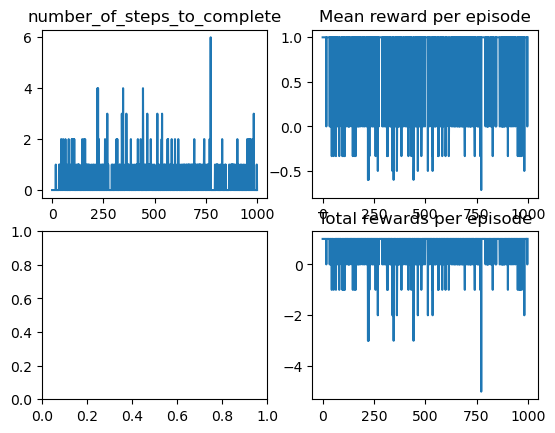

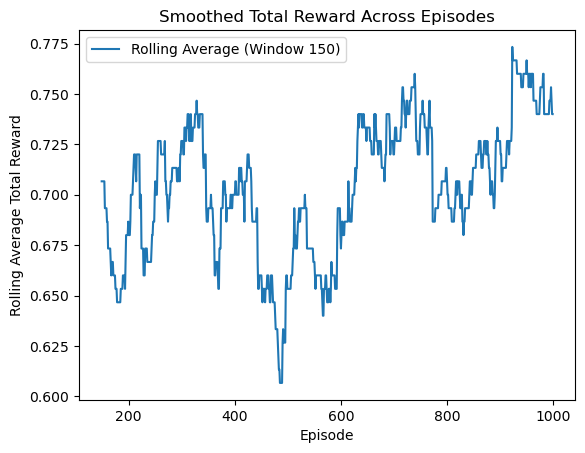

In [11]:
# Plotting

# 1: Create a single figure with two subplots for raw insight
fig, ax = plt.subplots(2, 2)

# Plot the data in the first subplot
ax[0][0].plot(number_of_steps_to_complete)
ax[0][0].set_title("number_of_steps_to_complete")

# Plot the data in the second subplot
ax[0][1].plot(mean_reward_per_episode)
ax[0][1].set_title("Mean reward per episode")


# Plot the data in the third subplot
ax[1][1].plot(total_reward_per_episode)
ax[1][1].set_title("Total rewards per episode")

# Show the figure
plt.show()
plt.close() 

# 2: Plot the rolling averages
plt.plot(rolling_averages_eps, rolling_averages, label=f'Rolling Average (Window {rolling_window_size})')
plt.xlabel('Episode')
plt.ylabel('Rolling Average Total Reward')
plt.title('Smoothed Total Reward Across Episodes')
plt.legend()
plt.show()



In [12]:
# Additional Metrics 
print(f"Mean Total Reward: {np.mean(total_reward_per_episode):.2f}")
print(f"Std Dev Total Reward: {np.std(total_reward_per_episode):.2f}")
print(f"Mean Episode Length: {np.mean(number_of_steps_to_complete):.2f} steps")


Mean Total Reward: 0.71
Std Dev Total Reward: 0.64
Mean Episode Length: 0.29 steps
